# Splitting the Data (Train/Test)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the processed data
df = pd.read_csv('../data/telco_churn_processed.csv')

# 2. Separate Features (X) and Target (y)
# X = All columns EXCEPT 'Churn'
# y = Only 'Churn'
X = df.drop('Churn', axis=1)
y = df['Churn']

# 3. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")

Training Data Shape: (5616, 30)
Testing Data Shape:  (1405, 30)


## Model 1: Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the Model
# max_depth=5 limits the tree size so it doesn't memorize noise (Overfitting)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. Train the Model
dt_model.fit(X_train, y_train)

# 3. Make Predictions on the  (Test Data)
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluate Performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# 5. Detailed Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7872

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1053
           1       0.60      0.46      0.52       352

    accuracy                           0.79      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.79      0.78      1405



## Visualize the Confusion Matrix.

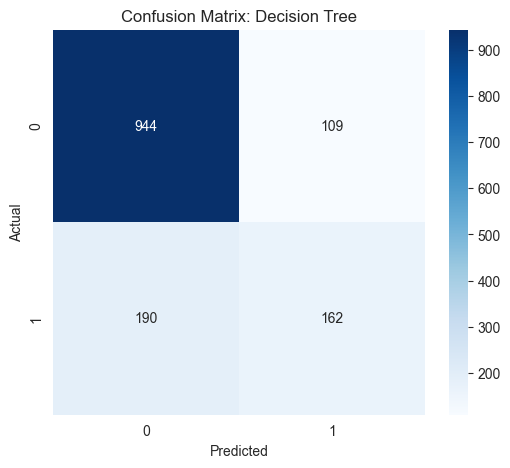

In [5]:
# Create a heatmap for the Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 2: Artificial Neural Network

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# 1. Build the "Brain" Structure
model = Sequential([
    # Input Layer
    Input(shape=(X_train.shape[1],)),

    # Hidden Layer 1: 16 Neurons to find patterns
    Dense(16, activation='relu'),

    # Hidden Layer 2: 8 Neurons to refine thinking
    Dense(8, activation='relu'),

    # Output Layer: 1 Neuron (0 to 1 probability)
    Dense(1, activation='sigmoid')
])

# 2. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the Model
#  store the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 4. Evaluate on the Test Set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Final Neural Network Accuracy: {accuracy:.4f}")

Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7266 - loss: 0.5072 - val_accuracy: 0.7278 - val_loss: 0.4763
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7562 - loss: 0.4598 - val_accuracy: 0.7633 - val_loss: 0.4565
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7907 - loss: 0.4481 - val_accuracy: 0.7705 - val_loss: 0.4497
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7950 - loss: 0.4425 - val_accuracy: 0.7705 - val_loss: 0.4417
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.4389 - val_accuracy: 0.7829 - val_loss: 0.4345
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8015 - loss: 0.4299 - val_accuracy: 0.7918 - val_loss: 0.4283
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8004 - loss: 0.4256 - val_accuracy: 0.7972 - val_loss: 0.4260
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.4228 - val_accuracy: 0.